# Chapter 3 練習と総合問題解答

## 3.2 Numpy

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

### 3.2.1 インデックス参照

#### <練習問題 1>

上記データのsample_namesのbに該当するdataを抽出してください。

In [2]:
# データの準備
sample_names = np.array(['a','b','c','d','a'])
random.seed(0)
data = random.randn(5,5)

print(sample_names)
print(data)

['a' 'b' 'c' 'd' 'a']
[[ 1.764  0.4    0.979  2.241  1.868]
 [-0.977  0.95  -0.151 -0.103  0.411]
 [ 0.144  1.454  0.761  0.122  0.444]
 [ 0.334  1.494 -0.205  0.313 -0.854]
 [-2.553  0.654  0.864 -0.742  2.27 ]]


In [3]:
data[sample_names == 'b']

array([[-0.977,  0.95 , -0.151, -0.103,  0.411]])

#### <練習問題 2>

上記データのsample_namesのc以外に該当するdataを抽出してください。

In [4]:
data[sample_names != 'c']

array([[ 1.764,  0.4  ,  0.979,  2.241,  1.868],
       [-0.977,  0.95 , -0.151, -0.103,  0.411],
       [ 0.334,  1.494, -0.205,  0.313, -0.854],
       [-2.553,  0.654,  0.864, -0.742,  2.27 ]])

#### <練習問題 3>

上記のconda_dataを変更して、x_arrayの3番目と4番目、y_arrayの1番、2番、5番目を出すように、条件制御を実施してください。

In [11]:
# 解答
cond_data = np.array([False,False,True,True,False])

x_array= np.array([1,2,3,4,5])

y_array= np.array([6,7,8,9,10])

# 条件制御実施
print(np.where(cond_data,x_array,y_array))

[ 6  7  3  4 10]


### 3.2.2 Numpyの演算処理

#### <練習問題 1>

以下のデータに対して、すべての要素の平方根を計算した行列を表示してください。

In [17]:
sample_multi_array_data2 = np.arange(16).reshape(4,4)
sample_multi_array_data2 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [18]:
# 解答
np.sqrt(sample_multi_array_data2)

array([[ 0.   ,  1.   ,  1.414,  1.732],
       [ 2.   ,  2.236,  2.449,  2.646],
       [ 2.828,  3.   ,  3.162,  3.317],
       [ 3.464,  3.606,  3.742,  3.873]])

#### <練習問題 2>

上記のデータsample_multi_array_data2の最大値、最小値、合計値、平均値を求めてください。

In [19]:
# 解答
print("最大値:",sample_multi_array_data2.max())
print("最小値:",sample_multi_array_data2.min())
print("合計値:",sample_multi_array_data2.sum())
print("平均値:",sample_multi_array_data2.mean())

最大値: 15
最小値: 0
合計値: 120
平均値: 7.5


#### <練習問題 3>

上記のデータsample_multi_array_data2の対角成分の和を求めてください。

In [20]:
# 解答
print("対角成分の和:",np.trace(sample_multi_array_data2))

対角成分の和: 30


### 3.2.3 配列操作とブロードキャスト

#### <練習問題 1>

次の2つの配列に対して、縦に結合してみましょう。

In [36]:
# データの準備
sample_array1 = np.arange(12).reshape(3,4)
sample_array2 = np.arange(12).reshape(3,4)

In [37]:
# 解答
np.concatenate([sample_array1,sample_array2])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

#### <練習問題 2>

上記の2つの配列に対して、横に結合してみましょう。

In [38]:
# 解答
np.concatenate([sample_array1,sample_array2],axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

#### <練習問題 3>

普通の以下のリストの各要素に3を加えるためにはどうすればよいでしょうか。numpyのブロードキャスト機能を使ってください。

In [39]:
sample_list = [1,2,3,4,5]

In [40]:
# 解答
np.array(sample_list)+3

array([4, 5, 6, 7, 8])

## 3.3 Scipy

### 3.3.1 補間

#### <練習問題 1>

以下のデータに対して、線形補間の計算をして、グラフを描いてください。

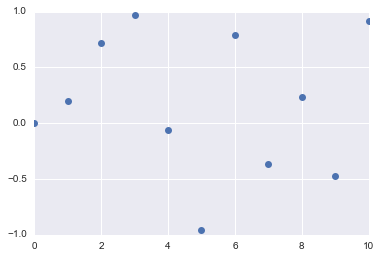

In [43]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.sin(x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)

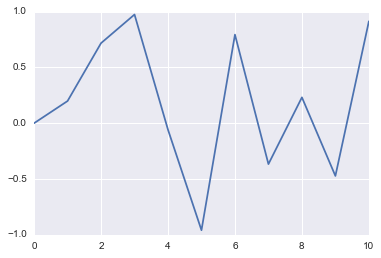

In [44]:
# 解答
from scipy import interpolate

# 線形補間
f = interpolate.interp1d(x, y,'linear')
plt.plot(x,f(x),'-')
plt.grid(True)

#### <練習問題 2>

2次元のスプライン補間はquadraticを使います。これをパラメータとして、上記のグラフに書き込んでください。

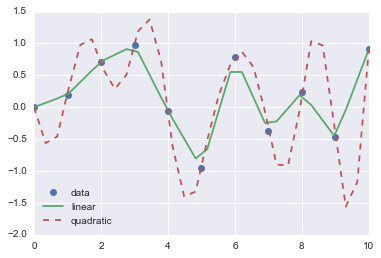

In [45]:
# スプライン2次補間も加えて、まとめてみる、
f2 = interpolate.interp1d(x, y,'quadratic')

#曲線を出すために、xの値を細かくする。
xnew = np.linspace(0, 10, num=30, endpoint=True)

# グラフ化
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')

# 凡例
plt.legend(['data', 'linear', 'quadratic'], loc='best')
plt.grid(True)

#### <練習問題 3>

3次元スプライン補間も加えてみましょう。

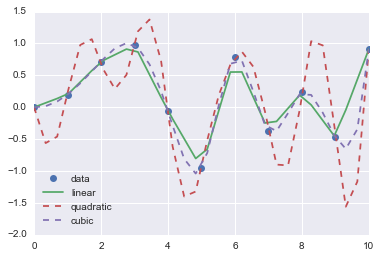

In [46]:
# 解答
# スプライン2,3次補間も加えて、まとめてみる、
f2 = interpolate.interp1d(x, y,'quadratic')
f3 = interpolate.interp1d(x, y,'cubic')

#曲線を出すために、xの値を細かくする。
xnew = np.linspace(0, 10, num=30, endpoint=True)

# グラフ化
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '--')

# 凡例
plt.legend(['data', 'linear','quadratic','cubic'], loc='best')
plt.grid(True)

### 3.3.2 線形代数：行列の分解

#### <練習問題 1>
以下の行列に対して、特異値分解をしてください。

In [51]:
B = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
B

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [52]:
# 解答
# 特異値分解の関数linalg
U, s, Vs = sp.linalg.svd(B)
m, n = B.shape

S = sp.linalg.diagsvd(s,m,n)

print("U.S.V* = \n",U@S@Vs)

U.S.V* = 
 [[  1.   2.   3.]
 [  4.   5.   6.]
 [  7.   8.   9.]
 [ 10.  11.  12.]]


#### <練習問題 2>
以下の行列に対して、LU分解をして、$Ax=b$の方程式を解いてください。

In [53]:
#データの準備
A = np.identity(3)
print(A)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 3
b = np.ones(3)
print(A)
print(b)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 3.  1.  1.]
 [ 1.  1.  0.]
 [ 1.  0.  1.]]
[ 1.  1.  1.]


In [54]:
# 解答
# 正方行列をLU分解する
(LU,piv) = sp.linalg.lu_factor(A)

L = np.identity(3) + np.tril(LU,-1)
U = np.triu(LU)
P = np.identity(3)[piv]

# 解を求める
sp.linalg.lu_solve((LU,piv),b)

array([-1.,  2.,  2.])

In [55]:
# 確認
np.dot(A,sp.linalg.lu_solve((LU,piv),b))

array([ 1.,  1.,  1.])

### 3.3.3 積分と微分方程式

#### <練習問題 1>
以下の積分を求めてみましょう。

\begin{eqnarray}
  \int_0^2 (x+1)^2 dx
\end{eqnarray}

In [5]:
# 解答
from scipy import integrate

def calc1(x):
    return (x+1)**2

# 計算結果と推定誤差
integrate.quad(calc1, 0, 2)

(8.667, 0.000)

#### <練習問題 2>
cos関数の範囲$(0,\pi)$の積分を求めてみましょう。

In [69]:
# 解答
import math

from numpy import cos
integrate.quad(cos, 0, math.pi/1)

(0.000, 0.000)

### 3.3.4 最適化

#### <練習問題 1>
以下の関数が0となる解を求めましょう。

\begin{eqnarray*}
\ f(x) = 5x -10
\end{eqnarray*}

In [83]:
# 解答
def f(x):
    y =  5*x - 10
    return y

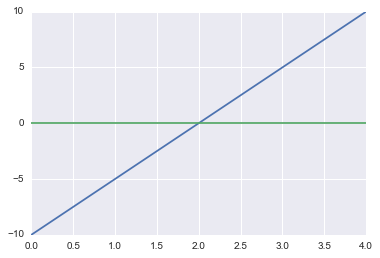

In [84]:
# 解答
x = np.linspace(0,4)
plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)

In [85]:
# 解答
from scipy.optimize import fsolve
x = fsolve(f,2)
print(x)

[ 2.]


#### <練習問題 2>
以下の関数が0となる解を求めましょう。

\begin{eqnarray*}
\ f(x) = x^3 - 2x^2 - 11x +12
\end{eqnarray*}

In [86]:
# 解答
def f2(x):
    y =  x**3 - 2 * x**2 - 11 * x + 12
    return y

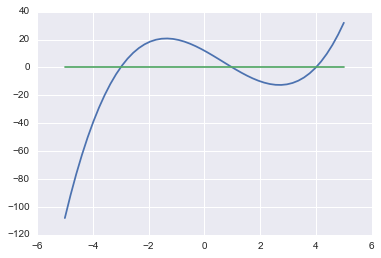

In [87]:
# 解答
x = np.linspace(-5,5)
plt.plot(x,f2(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)

グラフから解は-3と1と4付近にあることがわかります。

In [88]:
# 解答
from scipy.optimize import fsolve
x = fsolve(f2,-3)
print(x)

[-3.]


In [89]:
# 解答
# x = 1 付近
x = fsolve(f2,1)
print(x)

[ 1.]


In [90]:
# 解答
# x = 3 付近
x = fsolve(f2,3)
print(x)

[ 4.]


## 3.4 総合問題

### 3.4.1 総合問題1

以下の行列に対して、コレスキー分解をして、$Ax=b$の方程式を解いてください。

In [56]:
A = np.array([[5, 1, 0, 1],
              [1, 9, -5, 7],
              [0, -5, 8, -3],
              [1, 7, -3, 10]])
b = np.array([2, 10, 5, 10])

In [57]:
# 解答
L = sp.linalg.cholesky(A)

t = sp.linalg.solve(L, b)
x = sp.linalg.solve(L.T.conj(), t)

print(x)

[-0.07   0.174  0.747  1.962]


In [58]:
# 確認
np.dot(A,x)

array([  1.787,  11.493,  -0.779,  18.524])

numpyも計算できます。

In [59]:
# 解答
L = np.linalg.cholesky(A)

t = np.linalg.solve(L, b)
x = np.linalg.solve(L.T.conj(), t)

print(x)

[-0.051  2.157  2.01   0.098]


In [60]:
# 確認
np.dot(A,x)

array([  2.,  10.,   5.,  10.])

### 3.4.2 総合問題2

$0≤ x ≤ 1$、0≤y≤1−x の三角領域で定義される以下の関数の積分値を求めてみましょう。
\begin{eqnarray}
  \int_0^1 \int_0^{1-x} 1/(\sqrt{(x+y)}(1+x+y)^2) dy dx 
\end{eqnarray}


In [70]:
# 解答
integrate.dblquad(lambda x, y: 1/(np.sqrt(x+y)*(1+x+y)**2), 0, 1, lambda x: 0, lambda x: 1-x)

(0.285, 0.000)

### 3.4.3 総合問題3

以下の最適化問題をSicpyを使って解いてみましょう。

\begin{eqnarray*}
\ min \ f(x) = x^2+1
\\  s.t. x \ge -1
\end{eqnarray*}

In [91]:
# 解答
from scipy.optimize import minimize

# 目的関数
def func(x):
    return x ** 2 + 1

# 制約条件式
def cons(x):
    return (x + 1)

cons = (
    {'type': 'ineq', 'fun': cons}
)
x = -10 # 初期値は適当

result = minimize(func, x0=x, constraints=cons, method="SLSQP")
print(result)

     fun: array([ 1.])
     jac: array([  1.490e-08,   0.000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 0.])


In [92]:
print("Y:",result.fun)
print("X:",result.x)

Y: [ 1.]
X: [ 0.]
